In [2]:
import librosa
import librosa.display
%pylab inline --no-import-all
from scikits.audiolab import wavread
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import math
import numpy as np
from numpy.fft import fft
import pylab
import mir_eval
import seaborn
seaborn.set(style="ticks")


Populating the interactive namespace from numpy and matplotlib


In [54]:
filenameBecase="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/5h541.wav"
signal ,sample_rate=librosa.load(filenameBecase,sr=24000, mono=True)

signal=signal#[int(2.5 * sample_rate):int(3.0 * sample_rate)] 
print sample_rate
print signal.shape

from IPython.display import Audio
Audio(data=signal,rate=sample_rate)

24000
(120000,)


In [59]:
filenameNonBecase="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/NonBecasse/a9.wav"
signal_N ,sample_rate_N=librosa.load(filenameNonBecase,sr=24000, mono=True)

print sample_rate_N
print signal_N.shape
Audio(data=signal_N,rate=sample_rate_N)

24000
(120000,)


(120000,)


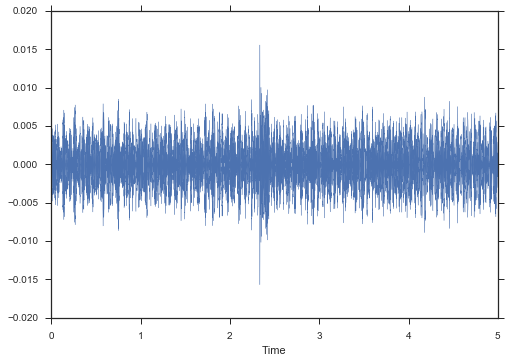

In [81]:
librosa.display.waveplot(signal,sample_rate)
print signal.shape

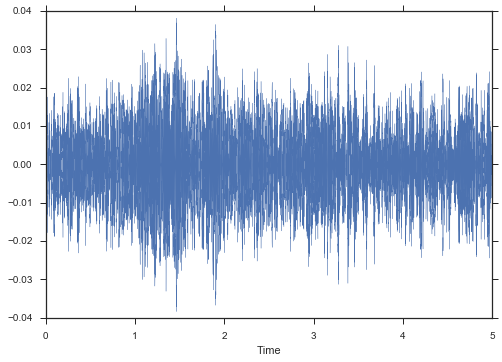

In [60]:
librosa.display.waveplot(signal_N,sample_rate_N)

(120000,)


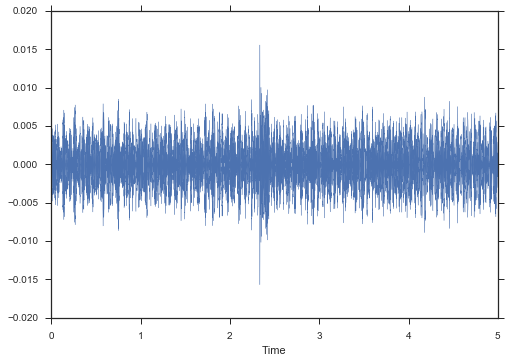

In [80]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
librosa.display.waveplot(signal,sample_rate)
print emphasized_signal.shape

In [138]:
'''
Short-time Fourier transform (STFT)
Returns a complex-valued matrix D such that
np.abs(D[f, t]) is the magnitude of frequency bin f at frame t
np.angle(D[f, t]) is the phase of frequency bin f at frame t
'''
def STFT_log_power(signal):
    D=librosa.stft(signal,n_fft=128)
    print "D.shape",D.shape
    log_power=librosa.logamplitude(D**2, ref_power=np.max)
    librosa.display.specshow(log_power,x_axis="time",y_axis="cqt_hz")
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    print "log_power",D.shape

Becase 
D.shape (65, 3751)
log_power (65, 3751)


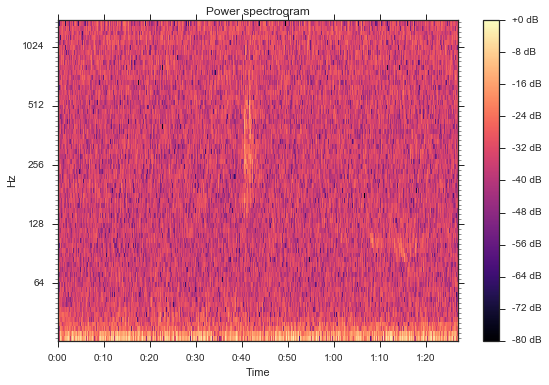

In [139]:
print "Becase "
STFT_log_power(signal)

NonBecase 
D.shape (65, 3751)
log_power (65, 3751)


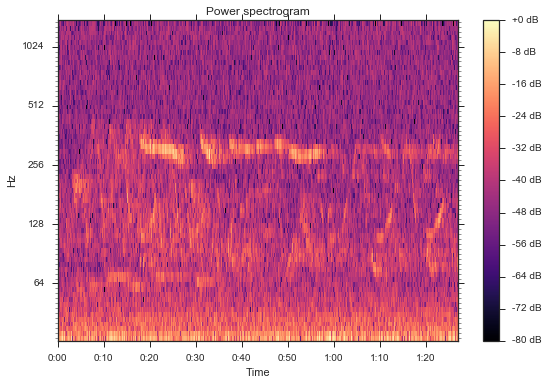

In [140]:
print "NonBecase "
STFT_log_power(signal_N)

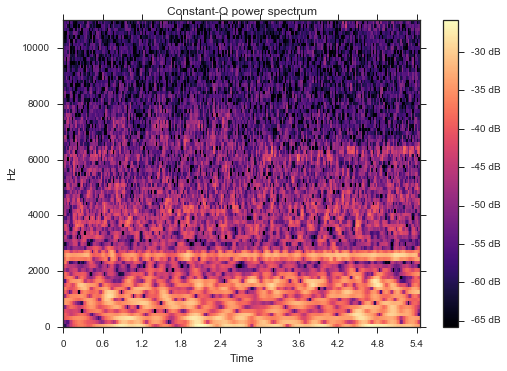

In [119]:
C=librosa.cqt(signal,sample_rate)
librosa.display.specshow(librosa.logamplitude(C**2,top_db=40),x_axis="time",y_axis="linear")
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')

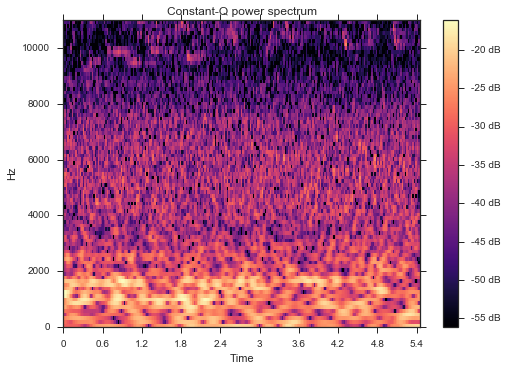

In [123]:
C_N=librosa.cqt(signal_N,sample_rate_N)
librosa.display.specshow(librosa.logamplitude(C_N**2,top_db=40),x_axis="time",y_axis="linear")
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')

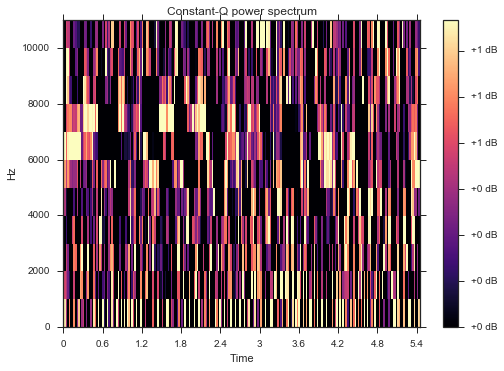

In [124]:
chroma=librosa.feature.chroma_cqt(C=C,sr=sample_rate)
librosa.display.specshow(chroma,x_axis="time",y_axis="linear")
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')

In [ ]:
chroma=librosa.feature.chroma_cqt(C=C,sr=sample_rate_N)
librosa.display.specshow(chroma,x_axis="time",y_axis="linear")
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')

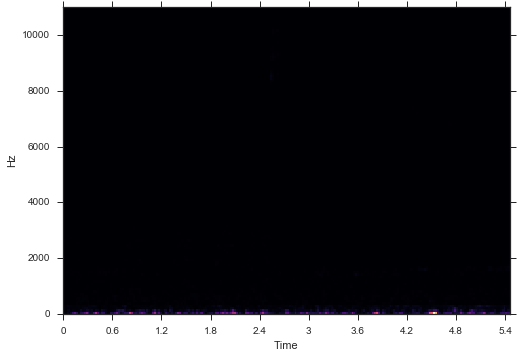

In [125]:
#Mel
M=librosa.feature.melspectrogram(signal,sample_rate)
librosa.display.specshow(M,x_axis="time",y_axis="linear")
plt.show()

(20, 235)


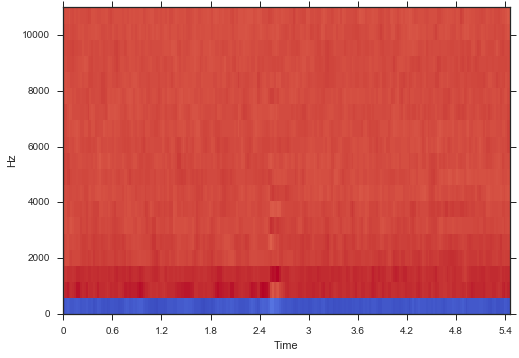

In [126]:
#MFCC
MFCC=librosa.feature.mfcc(signal,sample_rate)
librosa.display.specshow(MFCC,x_axis="time",y_axis="linear")
Audio(data=MFCC,rate=sample_rate)
print MFCC.shape

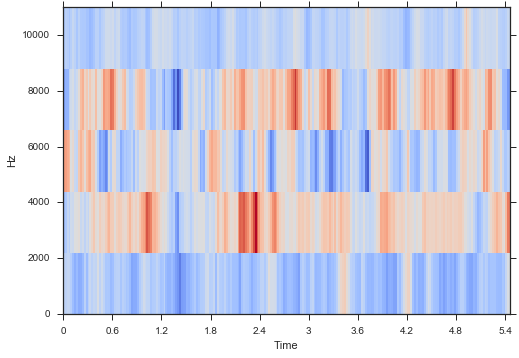

In [127]:
#tonnetz
tonnetz=librosa.feature.tonnetz(signal,sample_rate)
librosa.display.specshow(tonnetz,x_axis="time",y_axis="linear")
plt.show()

In [10]:
y_harmonic,y_percussive=librosa.effects.hpss(signal)
Audio(data=y_harmonic,rate=sample_rate)


In [107]:
Audio(data=y_percussive,rate=sample_rate)

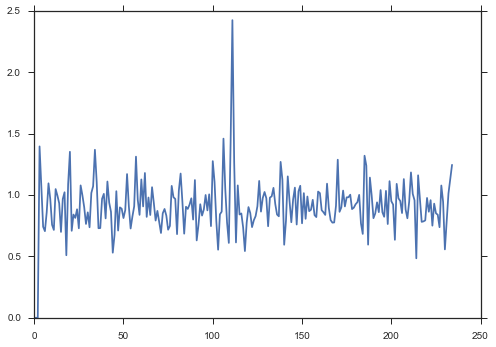

In [128]:
#ONsets and beat
#onset strength envelope
import librosa.onset
onset_envelope=librosa.onset.onset_strength(signal,sample_rate)
onsets=librosa.onset.onset_detect(onset_envelope)
plt.plot(onset_envelope,label="onset strength")

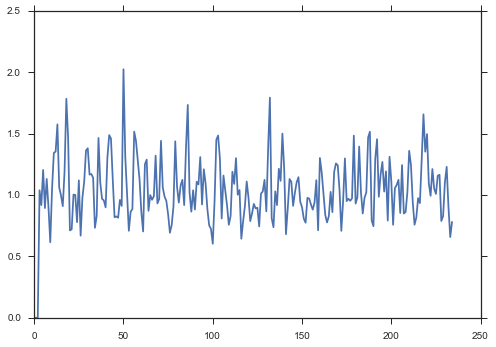

In [129]:
plt.colorbar
onset_envelope=librosa.onset.onset_strength(signal_N,sample_rate_N)
onsets=librosa.onset.onset_detect(onset_envelope)
plt.plot(onset_envelope,label="onset strength")

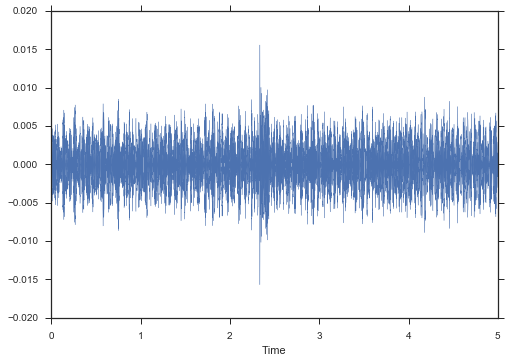

In [130]:

librosa.display.waveplot(signal,sample_rate)

In [111]:

tempo,beats=librosa.beat.beat_track(onset_envelope)
print onset_envelope.shape

(235,)


(235,)


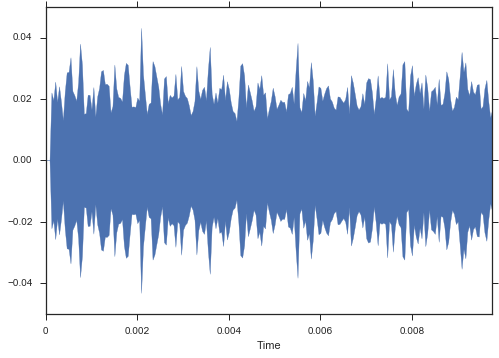

In [131]:
beat_times=librosa.frames_to_time(onset_envelope,sample_rate)
print beat_times.shape
#y_click=mir_eval.sonify.clicks(beat_times,sample_rate,len(signal))
Audio(data=beat_times,rate=sample_rate)
librosa.display.waveplot(beat_times,sample_rate)

In [146]:
def Power_spectrogram(signal):
    D = librosa.stft(signal)
    times = librosa.frames_to_time(np.arange(D.shape[1]))
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
    plt.title('Power spectrogram')

    onset_envelope=librosa.onset.onset_strength(signal,sample_rate)
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(times, 2 + onset_envelope / onset_envelope.max(), alpha=0.8,label='Mean (mel)')


    onset_env1 = librosa.onset.onset_strength(y=signal, sr=sample_rate,aggregate=np.median,fmax=8000, n_mels=256)
    plt.plot(times, 1 + onset_env1 / onset_env1.max(), alpha=0.8,label='Median (custom mel)')

    onset_env = librosa.onset.onset_strength(y=signal, sr=sample_rate,feature=librosa.cqt)
    plt.plot(times, onset_env / onset_env.max(), alpha=0.8,label='Mean (CQT)')

    plt.legend(frameon=True, framealpha=0.75)
    plt.ylabel('Normalized strength')
    plt.yticks([])
    plt.axis('tight')
    plt.tight_layout()


    print "amplitude : ",librosa.amplitude_to_db(D, ref=np.max).shape
    print "Mean (mel) : ",onset_envelope.shape
    print "Median (custom mel) : ",onset_env1.shape
    print "Mean (CQT) : ",onset_env.shape




amplitude :  (1025, 235)
Mean (mel) :  (235,)
Median (custom mel) :  (235,)
Mean (CQT) :  (235,)


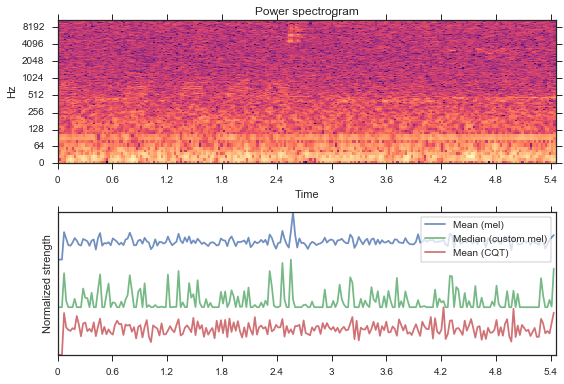

In [147]:
Power_spectrogram(signal)

amplitude :  (1025, 235)
Mean (mel) :  (235,)
Median (custom mel) :  (235,)
Mean (CQT) :  (235,)


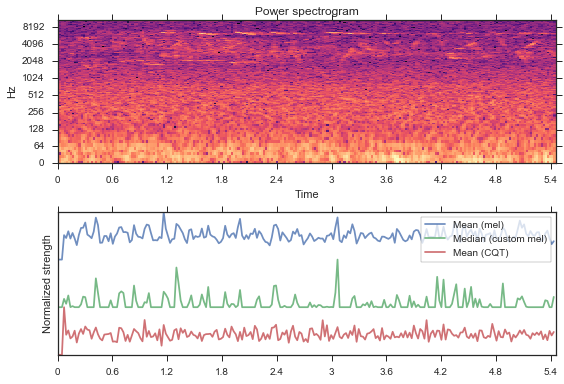

In [137]:
Power_spectrogram(signal_N)

In [131]:

times=librosa.frames_to_time(onset_env,sample_rate)
Audio(data=times,rate=sample_rate)